- title: Skewness
- slug: skewness
- summary: Understand how to interpret skewness in histogram
- date: 2018-12-3 16:00  
- category: Math
- subcategory: Descriptive Statistics
- posttype: Article
- keywords: skewness python
- tags: skewness, histograms, python, pandas
- authors: Dan Friedman

In a histogram to visualize a set of values, data can be considered "skewed" meaning it can have a long tail on a side.

This article will cover common interpretations of skewness.

### Import Modules

In [515]:
import seaborn as sns
import numpy as np
import scipy.stats as stats
import random
import warnings
import matplotlib.pyplot as plt
% matplotlib inline

I turn warnings off in this post because of an <a href='https://stackoverflow.com/a/52817582'>issue in Scipy</a> that will be fixed in a later version.

In [469]:
warnings.filterwarnings('ignore')

Visualization styling code

In [470]:
sns.set(rc={'figure.figsize':(10.5, 7.5)})
sns.set_context('talk')

### No Skew

#### Generate a Normal Distribution

Using the `numpy` package's `random` module, we can call the `normal()` method to create a list of values with a normal distribution by setting the following arguments:

- `loc` as the mean of the distribution
- `scale` as the standard deviation of the distribution
- `size` as number of samples

In [471]:
np.random.seed(4) # seed random number generator with fixed value so we always get same values below
normal_distr_values = list(np.random.normal(loc=100, scale=20, size=1300))

#### View Distribution of `normal_distr_values`

Below is a plot of a histogram of these values that resemble a normal distribution.

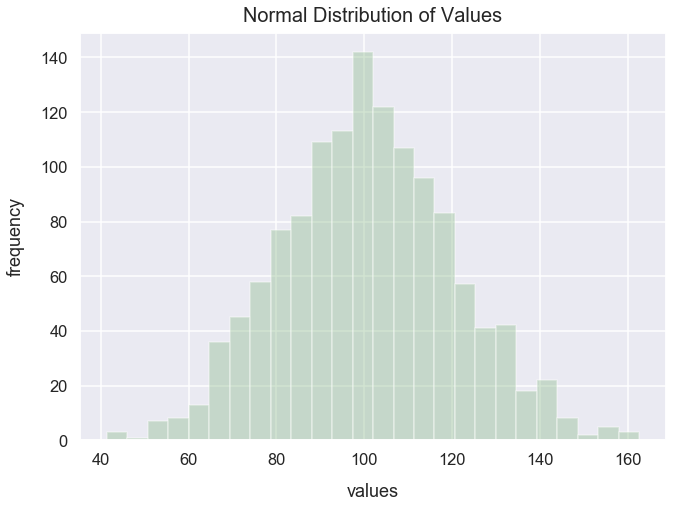

In [472]:
sns.distplot(normal_distr_values, kde=False, color='darkseagreen')
plt.title("Normal Distribution of Values", fontsize=20, y=1.012)
plt.xlabel("values", labelpad=15)
plt.ylabel("frequency", labelpad=15);

This distribution has **no skew** because it's perfectly symmetrical. With this distribution of no skew, the mean and median are typically at the peak. Let's calculate those and visualize them.

In [473]:
mean_normal_distr_values = round(np.mean(normal_distr_values), 2)
median_normal_distr_values = round(np.median(normal_distr_values), 2)

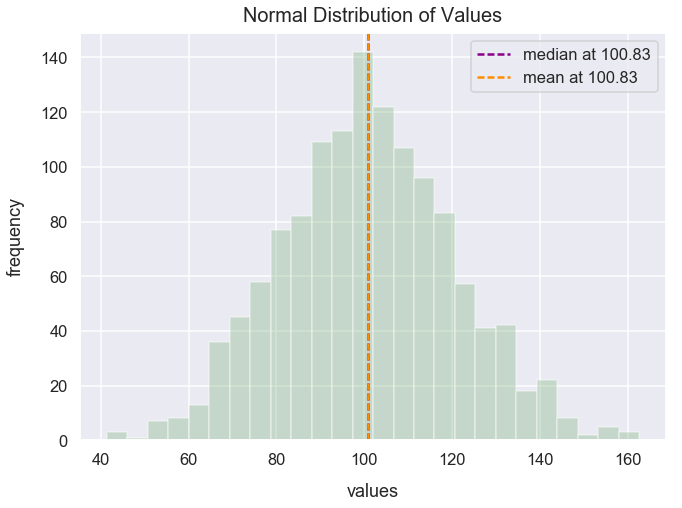

In [474]:
ax = sns.distplot(normal_distr_values, kde=False, color='darkseagreen')
plt.title("Normal Distribution of Values", fontsize=20, y=1.012)
plt.xlabel("values", labelpad=15)
plt.ylabel("frequency", labelpad=15);
names = ["median", "mean"]
colors = ['darkmagenta', 'darkorange']
measurements = [median_normal_distr_values, mean_normal_distr_values]
for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
plt.legend();

Looks like the median and mean values are the exact same and at the peak.

### Positive Skew

#### Get Diamonds Dataset

Import `diamonds` dataset from Seaborn library and assign to DataFrame `df_diamonds`.

Each row of `df_diamonds` contains details about a specific diamond purchased. We'll just utilize the `price` column in our analysis below.

In [475]:
df_diamonds = sns.load_dataset('diamonds')

Preview the first few rows of `df_diamonds`.

In [476]:
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### View Distribution of Diamond Prices

Below is a histogram of the `price` field in `df_diamonds`.

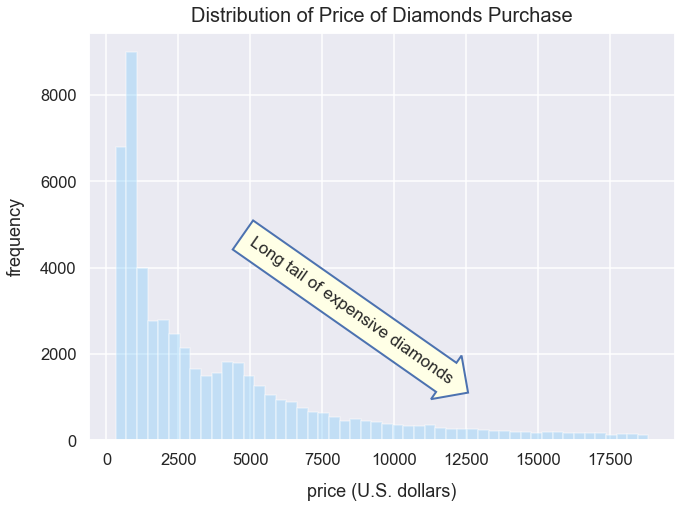

In [477]:
ax = sns.distplot(df_diamonds['price'], kde=False, color='lightskyblue')
plt.title("Distribution of Price of Diamonds Purchase", fontsize=20, y=1.012)
plt.xlabel("price (U.S. dollars)", labelpad=15)
plt.ylabel("frequency", labelpad=15)
bbox_props = dict(fc=(1, 1, 0.9), ec="b", lw=2)
t = ax.text(8500, 3000, "Long tail of expensive diamonds", ha="center", va="center", 
            rotation=325, size=17, bbox=bbox_props)
bb = t.get_bbox_patch()
bb.set_boxstyle("rarrow", pad=0.6)

Most people tend to buy diamonds that are just a few hundred or few thousand dollars. Yet, it seems a small group of people are willing to pay over 10,000.

This distribution has **positive skew** because there's a long tail of values on the positive side of the peak. You would otherwise say this data is "skewed to the right".

In distributions in which there's positive skew, it's important to understand where the mean and median lie. Let's plot this distribution again and mark the mean and median values.

Calculate the median and mean value of `horsepower_numerical_values` using numpy methods.

In [478]:
median_price = round(df_diamonds['price'].median(), 2)
mean_price = round(df_diamonds['price'].mean(), 2)

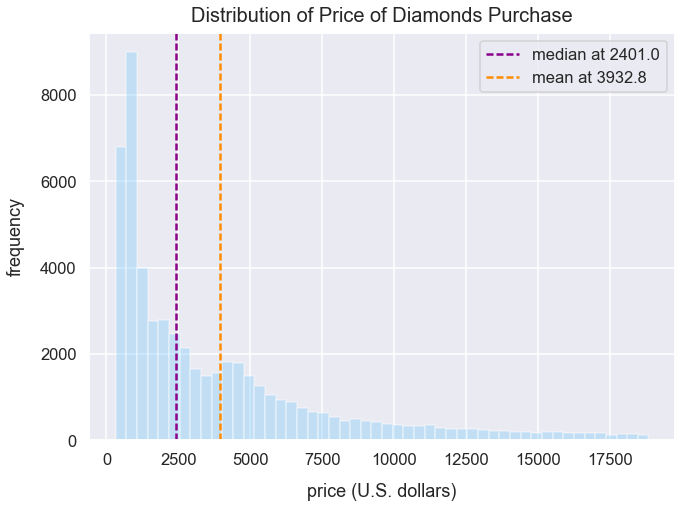

In [479]:
ax = sns.distplot(df_diamonds['price'], kde=False, color='lightskyblue')
plt.title("Distribution of Price of Diamonds Purchase", fontsize=20, y=1.012)
plt.xlabel("price (U.S. dollars)", labelpad=15)
plt.ylabel("frequency", labelpad=15)
names = ["median", "mean"]
colors = ['darkmagenta', 'darkorange']
measurements = [median_price, mean_price]
for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
plt.legend();

Nearly with all histograms that are positively skewed, the mean is greater than the median. The reason for this is that the long tail of values skews the mean higher than with a more normal distribution. Yet, the median isn't skewed by large values because it's just the "middle" of a list of sorted numbers.

### Negative Skew

#### Generate Fictional Meal Data

Using the `scipy` package's `stats` module, we can call the <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html'>beta() method</a> to create a list of values with a negatively skewed distribtion.

The data below ressembles the prices of meals for a fast casual restaurant.

In [509]:
typical_meal_value_dollars = list(stats.beta.rvs(10, 2, loc=-8, scale=23, size=35000))

I use the <a href='https://docs.python.org/3/library/random.html#functions-for-integers'>randrage() method</a> from Python's `random` module to generate a list of large meal orders between the prices of 15 and 25. 

In [510]:
large_meal_value_dollars = [random.randrange(15, 23) for value in range(0, 200)]

I concatenate the `typical_meal_value_dollars` and `large_meal_value_dollars` to create a new list assigned to the variable `meal_values_dollars`.

In [511]:
meal_values_dollars = typical_meal_value_dollars + large_meal_value_dollars

#### View Distribution of Meal Orders [$]

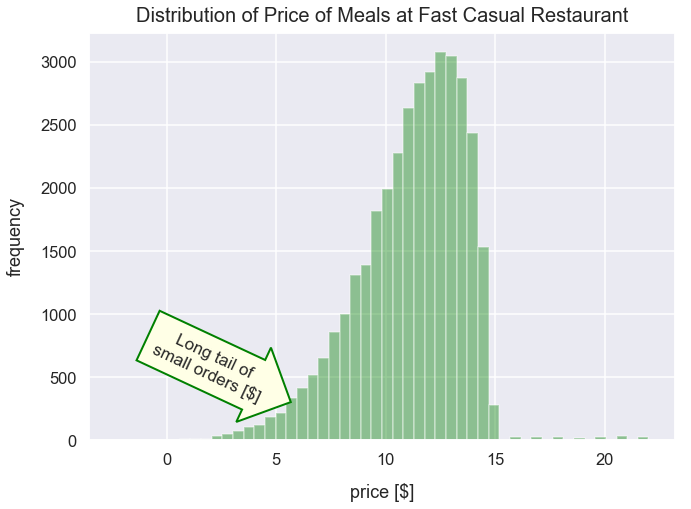

In [512]:
ax = sns.distplot(meal_values_dollars, kde=False, color='green')
plt.title("Distribution of Price of Meals at Fast Casual Restaurant", fontsize=20, y=1.012)
plt.xlabel("price [$]", labelpad=15)
plt.ylabel("frequency", labelpad=15)
bbox_props = dict(fc=(1, 1, 0.9), ec="green", lw=2)
t = ax.text(2, 600, "Long tail of\nsmall orders [$]", ha="center", va="center", 
            rotation=335, size=17, bbox=bbox_props)
bb = t.get_bbox_patch()
bb.set_boxstyle("rarrow", pad=0.6)

Most people tend to spend around 10 to 14 dollars on their order. Very few people spend greater than 15. Lots of people spend between 0 and 8 and likely buy small items like appetizers or just drinks.

This distribution has **negative skew** because there's a long tail of values on the negative side of the peak. You would otherwise say this data is "skewed to the left".

In distributions in which there's negative skew, it's important to understand where the mean and median lie. Let's plot this distribution again and mark the mean and median values.

Calculate the median and mean value of `meal_values_dollars` using numpy methods.

In [513]:
median_meal_price = round(np.median(meal_values_dollars), 2)
mean_meal_price = round(np.mean(meal_values_dollars), 2)

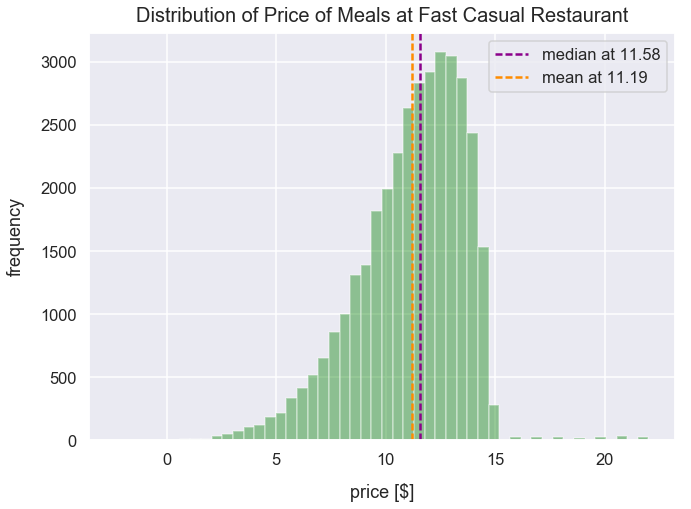

In [514]:
ax = sns.distplot(meal_values_dollars, kde=False, color='green')
plt.title("Distribution of Price of Meals at Fast Casual Restaurant", fontsize=20, y=1.012)
plt.xlabel("price [$]", labelpad=15)
plt.ylabel("frequency", labelpad=15)
names = ["median", "mean"]
colors = ['darkmagenta', 'darkorange']
measurements = [median_meal_price, mean_meal_price]
for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
plt.legend();

Nearly with all histograms that are negatively skewed, the mean is less than the median. The reason for this is that the long tail of values skews the mean lower than with a more normal distribution. Yet, the median isn't skewed by lots of small values because it's just the "middle" of a list of sorted numbers.